In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
%matplotlib inline
%config InlineBackend.figure_format='retina'
import cmocean
import cartopy.crs as ccrs
import matplotlib.path as mpath
import nc_time_axis
import pandas as pd
import matplotlib as mpl
import momlevel as ml
import gcsfs
import zarr
from matplotlib.ticker import FormatStrFormatter

In [2]:
def south_pole_map(cols=1, rows=1, fig_size=(12,8), max_extent=-50, facecolor='white'):
    ''' 
    User note: In order to call the function, begin cell with: fig, ax = south_pole_map(**args).
    
    Neglecting "fig, ax =" at the begeinning will not map your data to the existing axes.
    
    This function sets up a polar projection centered at the South Pole, which DataArrays can be plotted over.
    
    Optional arguments accepted for figure size, maximum (northward) extent and facecolor. Any number of columns and/or rows are also accepted for multiple subplots.
    
    If creating multiple subplots, ax=ax[*index*] must be passed in the plot call for each array.
    
    By default, these are set to (12,8), -50ºS and gray, respectively. Columns/Rows set to 1 by default – specifying axes in which to plot data is not necessary when using default column number.
    '''
    import matplotlib.path as mpath
    import numpy as np
    import cartopy.crs as ccrs
    
    fig,ax = plt.subplots(figsize=fig_size, ncols=cols, nrows=rows, subplot_kw={'projection': ccrs.SouthPolarStereo(), 'facecolor':facecolor}, layout='constrained')

    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    
    if rows>1 and cols>1:
        for i in range(rows):
            for j in range(cols):
                ax[i,j].set_boundary(circle, transform=ax[i,j].transAxes)

                # lat/long map extents. shows south pole out to 50ºS
                ax[i,j].set_extent([-180, 180, -90, max_extent], ccrs.PlateCarree())
    elif cols>1 and rows==1:
        for i in range(cols):
            ax[i].set_boundary(circle, transform=ax[i].transAxes)

            # lat/long map extents. shows south pole out to 50ºS
            ax[i].set_extent([-180, 180, -90, max_extent], ccrs.PlateCarree())
    elif rows>1 and cols==1:
        for i in range(rows):
            ax[i].set_boundary(circle, transform=ax[i].transAxes)

            # lat/long map extents. shows south pole out to 50ºS
            ax[i].set_extent([-180, 180, -90, max_extent], ccrs.PlateCarree())
    else:
        ax.set_boundary(circle, transform=ax.transAxes)

            # lat/long map extents. shows south pole out to 50ºS
        ax.set_extent([-180, 180, -90, max_extent], ccrs.PlateCarree())
    
    
    #must return fig, ax when creating multiple subplots in a function
    return fig, ax

In [3]:
mask_CM4= xr.open_dataset('/home/pachamama/shared/antarctica_mask/CM4_mask_antarctica.nc')
mask_ESM4= xr.open_dataset('/home/pachamama/shared/antarctica_mask/ESM4_mask_antarctica.nc')
mask_ERA5= xr.open_dataset('/home/pachamama/shared/antarctica_mask/ERA5_mask_antarctica.nc')

In [4]:
google_cloud_cmip6 = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')


In [5]:
gfdl_esm4_precip_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'pr' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)

In [6]:
gfdl_cm4_precip_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'pr' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-CM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)

In [7]:
ERA5_obs_data= xr.open_dataset('/backup/tuq41374/observations/reanalysis/ERA5/era5_mean_snowfall_rate_1940_monthly_ensemble.nc')

In [8]:
ERA5_precip=ERA5_obs_data.msr.mean('number')
ERA5_precip

<xarray.DataArray 'msr' (time: 12, latitude: 361, longitude: 720)>
array([[[5.0674839e-06, 5.0674839e-06, 5.0674839e-06, ...,
         5.0674839e-06, 5.0674839e-06, 5.0674839e-06],
        [5.2594828e-06, 5.2634582e-06, 5.2674322e-06, ...,
         5.2511359e-06, 5.2551086e-06, 5.2578935e-06],
        [5.5969722e-06, 5.6065096e-06, 5.6136678e-06, ...,
         5.5747105e-06, 5.5822647e-06, 5.5874307e-06],
        ...,
        [1.4342193e-06, 1.4346166e-06, 1.4373989e-06, ...,
         1.4366000e-06, 1.4358069e-06, 1.4346151e-06],
        [1.5880578e-06, 1.5892496e-06, 1.5904400e-06, ...,
         1.5884536e-06, 1.5884536e-06, 1.5880578e-06],
        [1.9462154e-06, 1.9462154e-06, 1.9462154e-06, ...,
         1.9462154e-06, 1.9462154e-06, 1.9462154e-06]],

       [[3.1741322e-06, 3.1741322e-06, 3.1741322e-06, ...,
         3.1741322e-06, 3.1741322e-06, 3.1741322e-06],
        [3.2238181e-06, 3.2250114e-06, 3.2254102e-06, ...,
         3.2218304e-06, 3.2230237e-06, 3.2230237e-06],
        [3.4309255e-06, 3.4325130e-06, 3.4344994e-06, ...,
         3.4285404e-06, 3.4289376e-06, 3.4297323e-06],
...
        [1.0092757e-06, 1.0092772e-06, 1.0080854e-06, ...,
         1.0132528e-06, 1.0132528e-06, 1.0116622e-06],
        [1.2143922e-06, 1.2135963e-06, 1.2124044e-06, ...,
         1.2159828e-06, 1.2147909e-06, 1.2143922e-06],
        [1.8265637e-06, 1.8265637e-06, 1.8265637e-06, ...,
         1.8265637e-06, 1.8265637e-06, 1.8265637e-06]],

       [[5.1004781e-06, 5.1004781e-06, 5.1004781e-06, ...,
         5.1004781e-06, 5.1004781e-06, 5.1004781e-06],
        [5.5091209e-06, 5.5095197e-06, 5.5091223e-06, ...,
         5.5134929e-06, 5.5115065e-06, 5.5107112e-06],
        [6.1423575e-06, 6.1415653e-06, 6.1399733e-06, ...,
         6.1526944e-06, 6.1499109e-06, 6.1471292e-06],
        ...,
        [1.0239834e-06, 1.0243806e-06, 1.0255724e-06, ...,
         1.0239834e-06, 1.0235860e-06, 1.0243806e-06],
        [1.1714612e-06, 1.1726545e-06, 1.1730532e-06, ...,
         1.1718585e-06, 1.1710639e-06, 1.1714612e-06],
        [1.4731719e-06, 1.4731719e-06, 1.4731719e-06, ...,
         1.4731719e-06, 1.4731719e-06, 1.4731719e-06]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.5 1.0 1.5 ... 358.0 358.5 359.0 359.5
  * latitude   (latitude) float32 90.0 89.5 89.0 88.5 ... -89.0 -89.5 -90.0
  * time       (time) datetime64[ns] 1940-01-01 1940-02-01 ... 1940-12-01

In [9]:
gfdl_esm4_precip_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
18988,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp585,r1i1p1f1,Amon,pr,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [10]:
gfdl_cm4_precip_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
2471,ScenarioMIP,NOAA-GFDL,GFDL-CM4,ssp585,r1i1p1f1,Amon,pr,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-CM...,NaN,20180701


In [11]:
gcs = gcsfs.GCSFileSystem(token='anon')
zstore = gfdl_cm4_precip_data.zstore.values[-1]
mapper = gcs.get_mapper(zstore)

precip_cm4 = xr.open_zarr(mapper, consolidated=True)
precip_cm4

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 180, lon: 288, time: 1032)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lon        (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(1032, 2), meta=np.ndarray>
Data variables:
    pr         (time, lat, lon) float32 dask.array<chunksize=(600, 180, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  60225.0
    comment:                <null ref>
    ...                     ...
    variable_id:            pr
    variant_info:           N/A
    variant_label:          r1i1p1f1
    status:                 2019-08-13;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/06d6927b-c820-432b-855b-35f5e60946c3
    version_id:             v20180701

In [12]:
gcs = gcsfs.GCSFileSystem(token='anon')
zstore = gfdl_esm4_precip_data.zstore.values[-1]
mapper = gcs.get_mapper(zstore)

precip_esm4 = xr.open_zarr(mapper, consolidated=True)
precip_esm4

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 180, lon: 288, time: 1032)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lon        (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(1032, 2), meta=np.ndarray>
Data variables:
    pr         (time, lat, lon) float32 dask.array<chunksize=(600, 180, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60225.0
    branch_time_in_parent:  60225.0
    comment:                <null ref>
    ...                     ...
    variable_id:            pr
    variant_info:           N/A
    variant_label:          r1i1p1f1
    status:                 2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/f0170c19-0300-497d-a8d3-9699e4a0f88e
    version_id:             v20180701

In [13]:
ESM4_pr= precip_esm4.pr
CM4_pr=precip_cm4.pr

In [14]:
ESM4_pr

<xarray.DataArray 'pr' (time: 1032, lat: 180, lon: 288)>
dask.array<open_dataset-pr, shape=(1032, 180, 288), dtype=float32, chunksize=(600, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
  * time     (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order1
    long_name:      Precipitation
    original_name:  pr
    standard_name:  precipitation_flux
    units:          kg m-2 s-1

In [15]:
CM4_pr

<xarray.DataArray 'pr' (time: 1032, lat: 180, lon: 288)>
dask.array<open_dataset-pr, shape=(1032, 180, 288), dtype=float32, chunksize=(600, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
  * time     (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order1
    long_name:      Precipitation
    original_name:  pr
    standard_name:  precipitation_flux
    units:          kg m-2 s-1

In [30]:
jan_sec=2678400
feb_sec=2419200
mar_sec=2678400
apr_sec=2592000
may_sec=2678400
jun_sec=2592000
jul_sec=2678400
aug_sec=2678400
sep_sec=2592000
oct_sec=2678400
nov_sec=2592000
dec_sec=2678400
ann_sec=jan_sec+feb_sec+mar_sec+apr_sec+may_sec+jun_sec+jul_sec+aug_sec+sep_sec+oct_sec+nov_sec+dec_sec
DJF_sec= dec_sec+jan_sec+feb_sec
JJA_sec= jun_sec+jul_sec+aug_sec
SON_sec = sep_sec+oct_sec+nov_sec
MAM_sec= mar_sec+apr_sec+may_sec

In [17]:
precip_seasonal_CM4 = CM4_pr.groupby('time.season').mean(dim='time')
precip_summer_CM4= precip_seasonal_CM4.sel(season= 'DJF')
precip_winter_CM4=precip_seasonal_CM4.sel(season='JJA')
precip_spring_CM4=precip_seasonal_CM4.sel(season='SON')
precip_fall_CM4=precip_seasonal_CM4.sel(season='MAM')

In [18]:
precip_seasonal_ESM4 = ESM4_pr.groupby('time.season').mean(dim='time')
precip_summer_ESM4= precip_seasonal_ESM4.sel(season= 'DJF')
precip_winter_ESM4=precip_seasonal_ESM4.sel(season='JJA')
precip_spring_ESM4=precip_seasonal_ESM4.sel(season='SON')
precip_fall_ESM4=precip_seasonal_ESM4.sel(season='MAM')

In [19]:
precip_seasonal_ERA5 = ERA5_precip.groupby('time.season').mean(dim='time')
precip_summer_ERA5= precip_seasonal_ERA5.sel(season= 'DJF')
precip_winter_ERA5=precip_seasonal_ERA5.sel(season='JJA')
precip_spring_ERA5=precip_seasonal_ERA5.sel(season='SON')
precip_fall_ERA5=precip_seasonal_ERA5.sel(season='MAM')

In [20]:
precip_total_CM4=CM4_pr.mean('time')
precip_total_ESM4=ESM4_pr.mean('time')
precip_total_ERA5=ERA5_precip.mean('time')

In [25]:

plateau_precip_CM4_bar=((precip_total_CM4*(mask_CM4.plateau_CM4)).mean('lat').mean('lon'))*(ann_sec)
ross_precip_CM4_bar=((precip_total_CM4*(mask_CM4.ross_CM4)).mean('lat').mean('lon'))*(ann_sec)
lowwest_precip_CM4_bar=((precip_total_CM4*(mask_CM4.lowwest_CM4)).mean('lat').mean('lon'))*(ann_sec)
loweast_precip_CM4_bar=((precip_total_CM4*(mask_CM4.loweast_CM4)).mean('lat').mean('lon'))*(ann_sec)
filchner_precip_CM4_bar=((precip_total_CM4*(mask_CM4.filchner_CM4)).mean('lat').mean('lon'))*(ann_sec)
peninsula_precip_CM4_bar=((precip_total_CM4*(mask_CM4.peninsula_CM4)).mean('lat').mean('lon'))*(ann_sec)

plateau_precip_ESM4_bar=((precip_total_ESM4*(mask_ESM4.plateau_ESM4)).mean('lat').mean('lon'))*(ann_sec)
ross_precip_ESM4_bar=(precip_total_ESM4*(mask_ESM4.ross_ESM4)).mean('lat').mean('lon')*(ann_sec)
lowwest_precip_ESM4_bar=(precip_total_ESM4*(mask_ESM4.lowwest_ESM4)).mean('lat').mean('lon')*(ann_sec)
loweast_precip_ESM4_bar=(precip_total_ESM4*(mask_ESM4.loweast_ESM4)).mean('lat').mean('lon')*(ann_sec)
filchner_precip_ESM4_bar=(precip_total_ESM4*(mask_ESM4.filchner_ESM4)).mean('lat').mean('lon')*(ann_sec)
peninsula_precip_ESM4_bar=(precip_total_ESM4*(mask_ESM4.peninsula_ESM4)).mean('lat').mean('lon')*(ann_sec)

plateau_precip_ERA5_bar=((precip_total_ERA5*(mask_ERA5.plateau_ERA5)).mean('latitude').mean('longitude'))*(ann_sec)
ross_precip_ERA5_bar=(precip_total_ERA5*(mask_ERA5.ross_ERA5)).mean('latitude').mean('longitude')*(ann_sec)
lowwest_precip_ERA5_bar=(precip_total_ERA5*(mask_ERA5.lowwest_ERA5)).mean('latitude').mean('longitude')*(ann_sec)
loweast_precip_ERA5_bar=(precip_total_ERA5*(mask_ERA5.loweast_ERA5)).mean('latitude').mean('longitude')*(ann_sec)
filchner_precip_ERA5_bar=(precip_total_ERA5*(mask_ERA5.filchner_ERA5)).mean('latitude').mean('longitude')*(ann_sec)
peninsula_precip_ERA5_bar=(precip_total_ERA5*(mask_ERA5.peninsula_ERA5)).mean('latitude').mean('longitude')*(ann_sec)

In [36]:
plateau_precip_summer_CM4=(precip_summer_CM4*(mask_CM4.plateau_CM4)).mean('lat').mean('lon')*DJF_sec
ross_precip_summer_CM4=(precip_summer_CM4*(mask_CM4.ross_CM4)).mean('lat').mean('lon')*DJF_sec
lowwest_precip_summer_CM4=(precip_summer_CM4*(mask_CM4.lowwest_CM4)).mean('lat').mean('lon')*DJF_sec
loweast_precip_summer_CM4=(precip_summer_CM4*(mask_CM4.loweast_CM4)).mean('lat').mean('lon')*DJF_sec
filchner_precip_summer_CM4=(precip_summer_CM4*(mask_CM4.filchner_CM4)).mean('lat').mean('lon')*DJF_sec
peninsula_precip_summer_CM4=(precip_summer_CM4*(mask_CM4.peninsula_CM4)).mean('lat').mean('lon')*DJF_sec

plateau_precip_summer_ESM4=(precip_summer_ESM4*(mask_ESM4.plateau_ESM4)).mean('lat').mean('lon')*DJF_sec
ross_precip_summer_ESM4=(precip_summer_ESM4*(mask_ESM4.ross_ESM4)).mean('lat').mean('lon')*DJF_sec
lowwest_precip_summer_ESM4=(precip_summer_ESM4*(mask_ESM4.lowwest_ESM4)).mean('lat').mean('lon')*DJF_sec
loweast_precip_summer_ESM4=(precip_summer_ESM4*(mask_ESM4.loweast_ESM4)).mean('lat').mean('lon')*DJF_sec
filchner_precip_summer_ESM4=(precip_summer_ESM4*(mask_ESM4.filchner_ESM4)).mean('lat').mean('lon')*DJF_sec
peninsula_precip_summer_ESM4=(precip_summer_ESM4*(mask_ESM4.peninsula_ESM4)).mean('lat').mean('lon')*DJF_sec

plateau_precip_summer_ERA5=(precip_summer_ERA5*(mask_ERA5.plateau_ERA5)).mean('latitude').mean('longitude')*DJF_sec
ross_precip_summer_ERA5=(precip_summer_ERA5*(mask_ERA5.ross_ERA5)).mean('latitude').mean('longitude')*DJF_sec
lowwest_precip_summer_ERA5=(precip_summer_ERA5*(mask_ERA5.lowwest_ERA5)).mean('latitude').mean('longitude')*DJF_sec
loweast_precip_summer_ERA5=(precip_summer_ERA5*(mask_ERA5.loweast_ERA5)).mean('latitude').mean('longitude')*DJF_sec
filchner_precip_summer_ERA5=(precip_summer_ERA5*(mask_ERA5.filchner_ERA5)).mean('latitude').mean('longitude')*DJF_sec
peninsula_precip_summer_ERA5=(precip_summer_ERA5*(mask_ERA5.peninsula_ERA5)).mean('latitude').mean('longitude')*DJF_sec

In [40]:
plateau_precip_winter_CM4=(precip_winter_CM4*(mask_CM4.plateau_CM4)).mean('lat').mean('lon')*JJA_sec
ross_precip_winter_CM4=(precip_winter_CM4*(mask_CM4.ross_CM4)).mean('lat').mean('lon')*JJA_sec
lowwest_precip_winter_CM4=(precip_winter_CM4*(mask_CM4.lowwest_CM4)).mean('lat').mean('lon')*JJA_sec
loweast_precip_winter_CM4=(precip_winter_CM4*(mask_CM4.loweast_CM4)).mean('lat').mean('lon')*JJA_sec
filchner_precip_winter_CM4=(precip_winter_CM4*(mask_CM4.filchner_CM4)).mean('lat').mean('lon')*JJA_sec
peninsula_precip_winter_CM4=(precip_winter_CM4*(mask_CM4.peninsula_CM4)).mean('lat').mean('lon')*JJA_sec

plateau_precip_winter_ESM4=(precip_winter_ESM4*(mask_ESM4.plateau_ESM4)).mean('lat').mean('lon')*JJA_sec
ross_precip_winter_ESM4=(precip_winter_ESM4*(mask_ESM4.ross_ESM4)).mean('lat').mean('lon')*JJA_sec
lowwest_precip_winter_ESM4=(precip_winter_ESM4*(mask_ESM4.lowwest_ESM4)).mean('lat').mean('lon')*JJA_sec
loweast_precip_winter_ESM4=(precip_winter_ESM4*(mask_ESM4.loweast_ESM4)).mean('lat').mean('lon')*JJA_sec
filchner_precip_winter_ESM4=(precip_winter_ESM4*(mask_ESM4.filchner_ESM4)).mean('lat').mean('lon')*JJA_sec
peninsula_precip_winter_ESM4=(precip_winter_ESM4*(mask_ESM4.peninsula_ESM4)).mean('lat').mean('lon')*JJA_sec

plateau_precip_winter_ERA5=(precip_winter_ERA5*(mask_ERA5.plateau_ERA5)).mean('latitude').mean('longitude')*JJA_sec
ross_precip_winter_ERA5=(precip_winter_ERA5*(mask_ERA5.ross_ERA5)).mean('latitude').mean('longitude')*JJA_sec
lowwest_precip_winter_ERA5=(precip_winter_ERA5*(mask_ERA5.lowwest_ERA5)).mean('latitude').mean('longitude')*JJA_sec
loweast_precip_winter_ERA5=(precip_winter_ERA5*(mask_ERA5.loweast_ERA5)).mean('latitude').mean('longitude')*JJA_sec
filchner_precip_winter_ERA5=(precip_winter_ERA5*(mask_ERA5.filchner_ERA5)).mean('latitude').mean('longitude')*JJA_sec
peninsula_precip_winter_ERA5=(precip_winter_ERA5*(mask_ERA5.peninsula_ERA5)).mean('latitude').mean('longitude')*JJA_sec

In [47]:
plateau_precip_spring_CM4=(precip_spring_CM4*(mask_CM4.plateau_CM4)).mean('lat').mean('lon')*SON_sec
ross_precip_spring_CM4=(precip_spring_CM4*(mask_CM4.ross_CM4)).mean('lat').mean('lon')*SON_sec
lowwest_precip_spring_CM4=(precip_spring_CM4*(mask_CM4.lowwest_CM4)).mean('lat').mean('lon')*SON_sec
loweast_precip_spring_CM4=(precip_spring_CM4*(mask_CM4.loweast_CM4)).mean('lat').mean('lon')*SON_sec
filchner_precip_spring_CM4=(precip_spring_CM4*(mask_CM4.filchner_CM4)).mean('lat').mean('lon')*SON_sec
peninsula_precip_spring_CM4=(precip_spring_CM4*(mask_CM4.peninsula_CM4)).mean('lat').mean('lon')*SON_sec

plateau_precip_spring_ESM4=(precip_spring_ESM4*(mask_ESM4.plateau_ESM4)).mean('lat').mean('lon')*SON_sec
ross_precip_spring_ESM4=(precip_spring_ESM4*(mask_ESM4.ross_ESM4)).mean('lat').mean('lon')*SON_sec
lowwest_precip_spring_ESM4=(precip_spring_ESM4*(mask_ESM4.lowwest_ESM4)).mean('lat').mean('lon')*SON_sec
loweast_precip_spring_ESM4=(precip_spring_ESM4*(mask_ESM4.loweast_ESM4)).mean('lat').mean('lon')*SON_sec
filchner_precip_spring_ESM4=(precip_spring_ESM4*(mask_ESM4.filchner_ESM4)).mean('lat').mean('lon')*SON_sec
peninsula_precip_spring_ESM4=(precip_spring_ESM4*(mask_ESM4.peninsula_ESM4)).mean('lat').mean('lon')*SON_sec

plateau_precip_spring_ERA5=(precip_spring_ERA5*(mask_ERA5.plateau_ERA5)).mean('latitude').mean('longitude')*SON_sec
ross_precip_spring_ERA5=(precip_spring_ERA5*(mask_ERA5.ross_ERA5)).mean('latitude').mean('longitude')*SON_sec
lowwest_precip_spring_ERA5=(precip_spring_ERA5*(mask_ERA5.lowwest_ERA5)).mean('latitude').mean('longitude')*SON_sec
loweast_precip_spring_ERA5=(precip_spring_ERA5*(mask_ERA5.loweast_ERA5)).mean('latitude').mean('longitude')*SON_sec
filchner_precip_spring_ERA5=(precip_spring_ERA5*(mask_ERA5.filchner_ERA5)).mean('latitude').mean('longitude')*SON_sec
peninsula_precip_spring_ERA5=(precip_spring_ERA5*(mask_ERA5.peninsula_ERA5)).mean('latitude').mean('longitude')*SON_sec

In [52]:
plateau_precip_fall_CM4=(precip_fall_CM4*(mask_CM4.plateau_CM4)).mean('lat').mean('lon')*MAM_sec
ross_precip_fall_CM4=(precip_fall_CM4*(mask_CM4.ross_CM4)).mean('lat').mean('lon')*MAM_sec
lowwest_precip_fall_CM4=(precip_fall_CM4*(mask_CM4.lowwest_CM4)).mean('lat').mean('lon')*MAM_sec
loweast_precip_fall_CM4=(precip_fall_CM4*(mask_CM4.loweast_CM4)).mean('lat').mean('lon')*MAM_sec
filchner_precip_fall_CM4=(precip_fall_CM4*(mask_CM4.filchner_CM4)).mean('lat').mean('lon')*MAM_sec
peninsula_precip_fall_CM4=(precip_fall_CM4*(mask_CM4.peninsula_CM4)).mean('lat').mean('lon')*MAM_sec

plateau_precip_fall_ESM4=(precip_fall_ESM4*(mask_ESM4.plateau_ESM4)).mean('lat').mean('lon')*MAM_sec
ross_precip_fall_ESM4=(precip_fall_ESM4*(mask_ESM4.ross_ESM4)).mean('lat').mean('lon')*MAM_sec
lowwest_precip_fall_ESM4=(precip_fall_ESM4*(mask_ESM4.lowwest_ESM4)).mean('lat').mean('lon')*MAM_sec
loweast_precip_fall_ESM4=(precip_fall_ESM4*(mask_ESM4.loweast_ESM4)).mean('lat').mean('lon')*MAM_sec
filchner_precip_fall_ESM4=(precip_fall_ESM4*(mask_ESM4.filchner_ESM4)).mean('lat').mean('lon')*MAM_sec
peninsula_precip_fall_ESM4=(precip_fall_ESM4*(mask_ESM4.peninsula_ESM4)).mean('lat').mean('lon')*MAM_sec

plateau_precip_fall_ERA5=(precip_fall_ERA5*(mask_ERA5.plateau_ERA5)).mean('latitude').mean('longitude')*MAM_sec
ross_precip_fall_ERA5=(precip_fall_ERA5*(mask_ERA5.ross_ERA5)).mean('latitude').mean('longitude')*MAM_sec
lowwest_precip_fall_ERA5=(precip_fall_ERA5*(mask_ERA5.lowwest_ERA5)).mean('latitude').mean('longitude')*MAM_sec
loweast_precip_fall_ERA5=(precip_fall_ERA5*(mask_ERA5.loweast_ERA5)).mean('latitude').mean('longitude')*MAM_sec
filchner_precip_fall_ERA5=(precip_fall_ERA5*(mask_ERA5.filchner_ERA5)).mean('latitude').mean('longitude')*MAM_sec
peninsula_precip_fall_ERA5=(precip_fall_ERA5*(mask_ERA5.peninsula_ERA5)).mean('latitude').mean('longitude')*MAM_sec

In [26]:
plat_value_ESM4=print(plateau_precip_ESM4_bar.values)
ross_value_ESM4= print(ross_precip_ESM4_bar.values)
west_value_ESM4=print(lowwest_precip_ESM4_bar.values)
east_value_ESM4=print(loweast_precip_ESM4_bar.values)
filch_value_ESM4=print(filchner_precip_ESM4_bar.values)
pen_value_ESM4=print(peninsula_precip_ESM4_bar.values)

69.07796680752654
209.17227551399264
221.95357071905164
334.75986213306896
246.67955531913321
878.7348217447288


In [27]:
plat_value_CM4=print(plateau_precip_CM4_bar.values)
ross_value_CM4= print(ross_precip_CM4_bar.values)
west_value_CM4=print(lowwest_precip_CM4_bar.values)
east_value_CM4=print(loweast_precip_CM4_bar.values)
filch_value_CM4=print(filchner_precip_CM4_bar.values)
pen_value_CM4=print(peninsula_precip_CM4_bar.values)

61.688653913734015
210.2116618261789
210.11204984824872
320.4848031455185
224.34103148407303
842.8247180418111


In [28]:
plat_value_ERA5=print(plateau_precip_ERA5_bar.values)
ross_value_ERA5= print(ross_precip_ERA5_bar.values)
west_value_ERA5=print(lowwest_precip_ERA5_bar.values)
east_value_ERA5=print(loweast_precip_ERA5_bar.values)
filch_value_ERA5=print(filchner_precip_ERA5_bar.values)
pen_value_ERA5=print(peninsula_precip_ERA5_bar.values)

66.53838481361163
231.10882357286755
211.83678836678155
244.46245025319513
201.8778134151944
699.4365885620937


(0.0, 900.0)

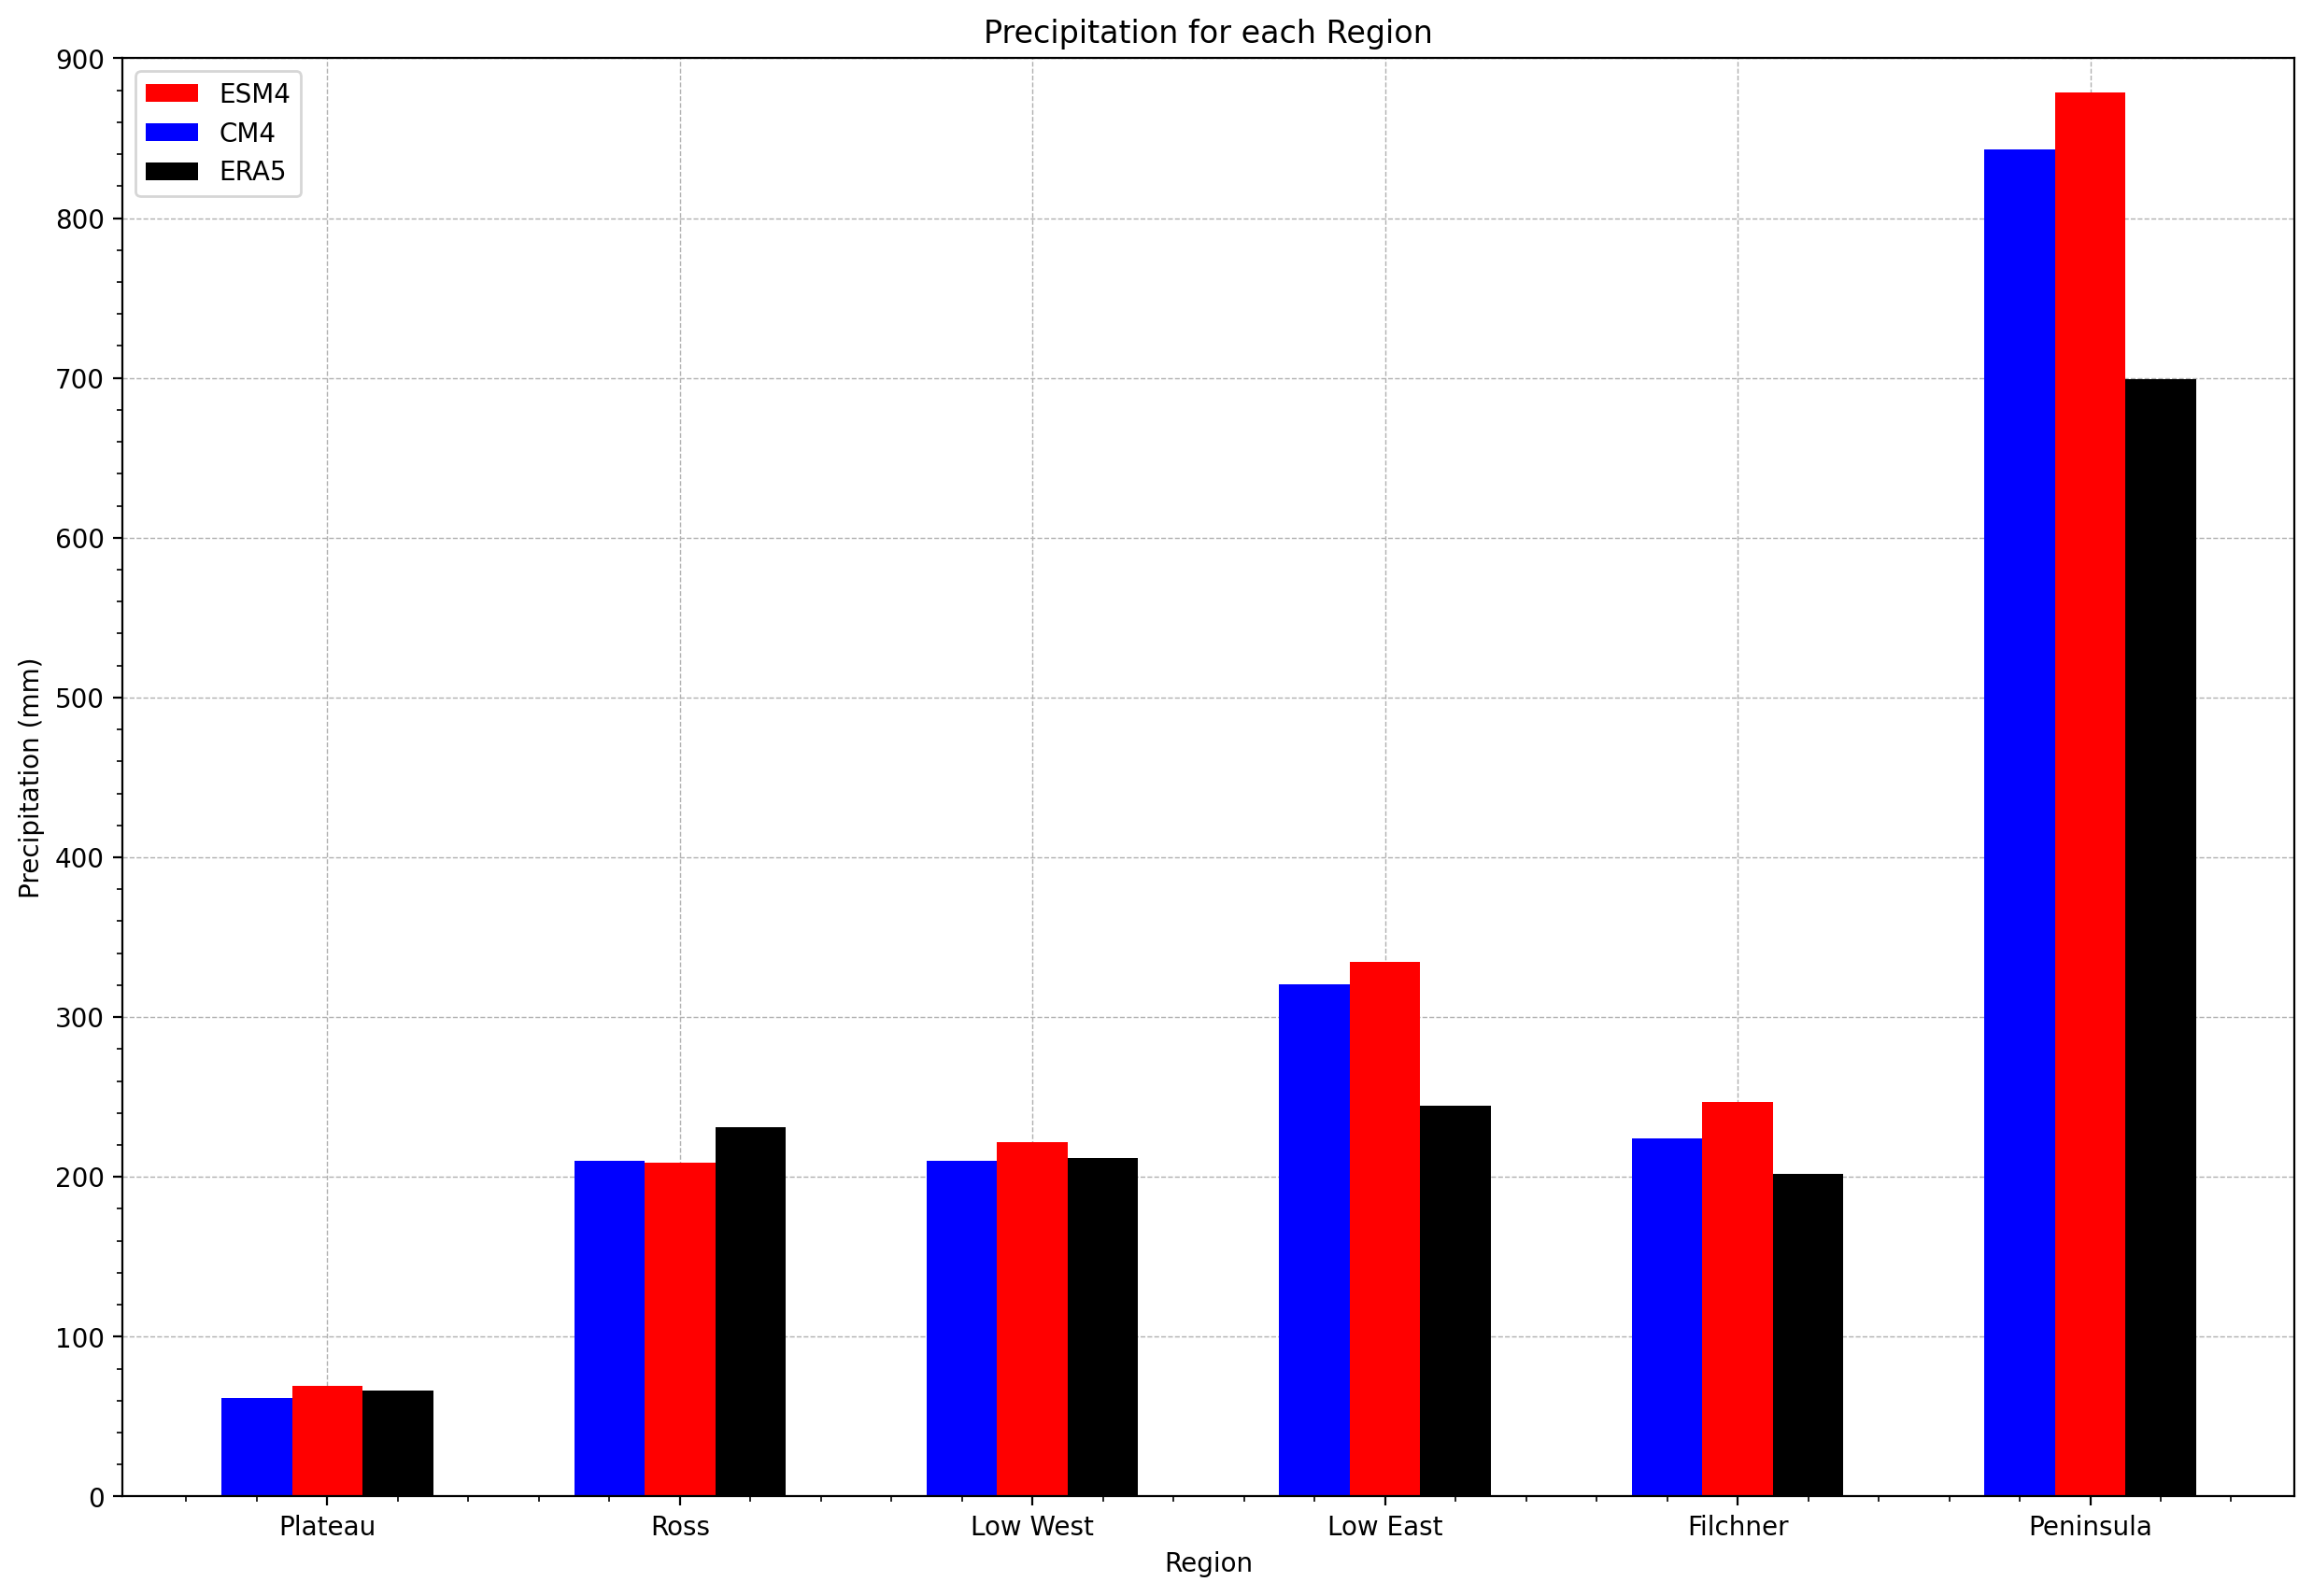

In [62]:

fig, ax= plt.subplots(figsize= (15,10))

X = ['Plateau','Ross','Low West','Low East', 'Filchner', 'Peninsula'] 
CM4_total = [61.688653913734015,
210.2116618261789,
210.11204984824872,
320.4848031455185,
224.34103148407303,
842.8247180418111] 
ESM4_total = [69.07796680752654,
209.17227551399264,
221.95357071905164,
334.75986213306896,
246.67955531913321,
878.7348217447288] 

ERA5_total = [66.53838481361163,
231.10882357286755,
211.83678836678155,
244.46245025319513,
201.8778134151944,
699.4365885620937]
  
X_axis = np.arange(len(X)) 
plt.bar(X_axis, ESM4_total, 0.2, label = 'ESM4', color='r') 
plt.bar(X_axis - 0.2, CM4_total, 0.2, label = 'CM4', color= 'blue') 
plt.bar(X_axis + 0.2, ERA5_total, 0.2, label= 'ERA5', color= 'k')
ax.grid(linewidth=0.5, linestyle= '--')
ax.set_axisbelow(True)
plt.xticks(X_axis, X) 
plt.xlabel("Region") 
plt.ylabel("Precipitation (mm)" )
plt.title("Precipitation for each Region") 
plt.legend() 
ax.minorticks_on()
plt.ylim(0,900)


In [32]:
plat_value_CM4_summer=print(plateau_precip_summer_CM4.values)
ross_value_CM4_summer= print(ross_precip_summer_CM4.values)
west_value_CM4_summer=print(lowwest_precip_summer_CM4.values)
east_value_CM4_summer=print(loweast_precip_summer_CM4.values)
filch_value_CM4_summer=print(filchner_precip_summer_CM4.values)
pen_value_CM4_summer=print(peninsula_precip_summer_CM4.values)

13.320651913090842
48.54911407164764
46.97914955613669
71.73611936741509
39.29711919045076
168.89515455113724


In [33]:
plat_value_ESM4_summer=print(plateau_precip_summer_ESM4.values)
ross_value_ESM4_summer= print(ross_precip_summer_ESM4.values)
west_value_ESM4_summer=print(lowwest_precip_summer_ESM4.values)
east_value_ESM4_summer=print(loweast_precip_summer_ESM4.values)
filch_value_ESM4_summer=print(filchner_precip_summer_ESM4.values)
pen_value_ESM4_summer=print(peninsula_precip_summer_ESM4.values)

15.110158805327956
50.37882748001721
46.11641519295517
70.99006266798824
40.02638287784066
173.32470486871898


In [37]:
plat_value_ERA5_summer=print(plateau_precip_summer_ERA5.values)
ross_value_ERA5_summer= print(ross_precip_summer_ERA5.values)
west_value_ERA5_summer=print(lowwest_precip_summer_ERA5.values)
east_value_ERA5_summer=print(loweast_precip_summer_ERA5.values)
filch_value_ERA5_summer=print(filchner_precip_summer_ERA5.values)
pen_value_ERA5_summer=print(peninsula_precip_summer_ERA5.values)

11.868570876686135
40.95920658437535
36.43750863557216
41.650032697361894
49.542500826646574
118.13077380065806


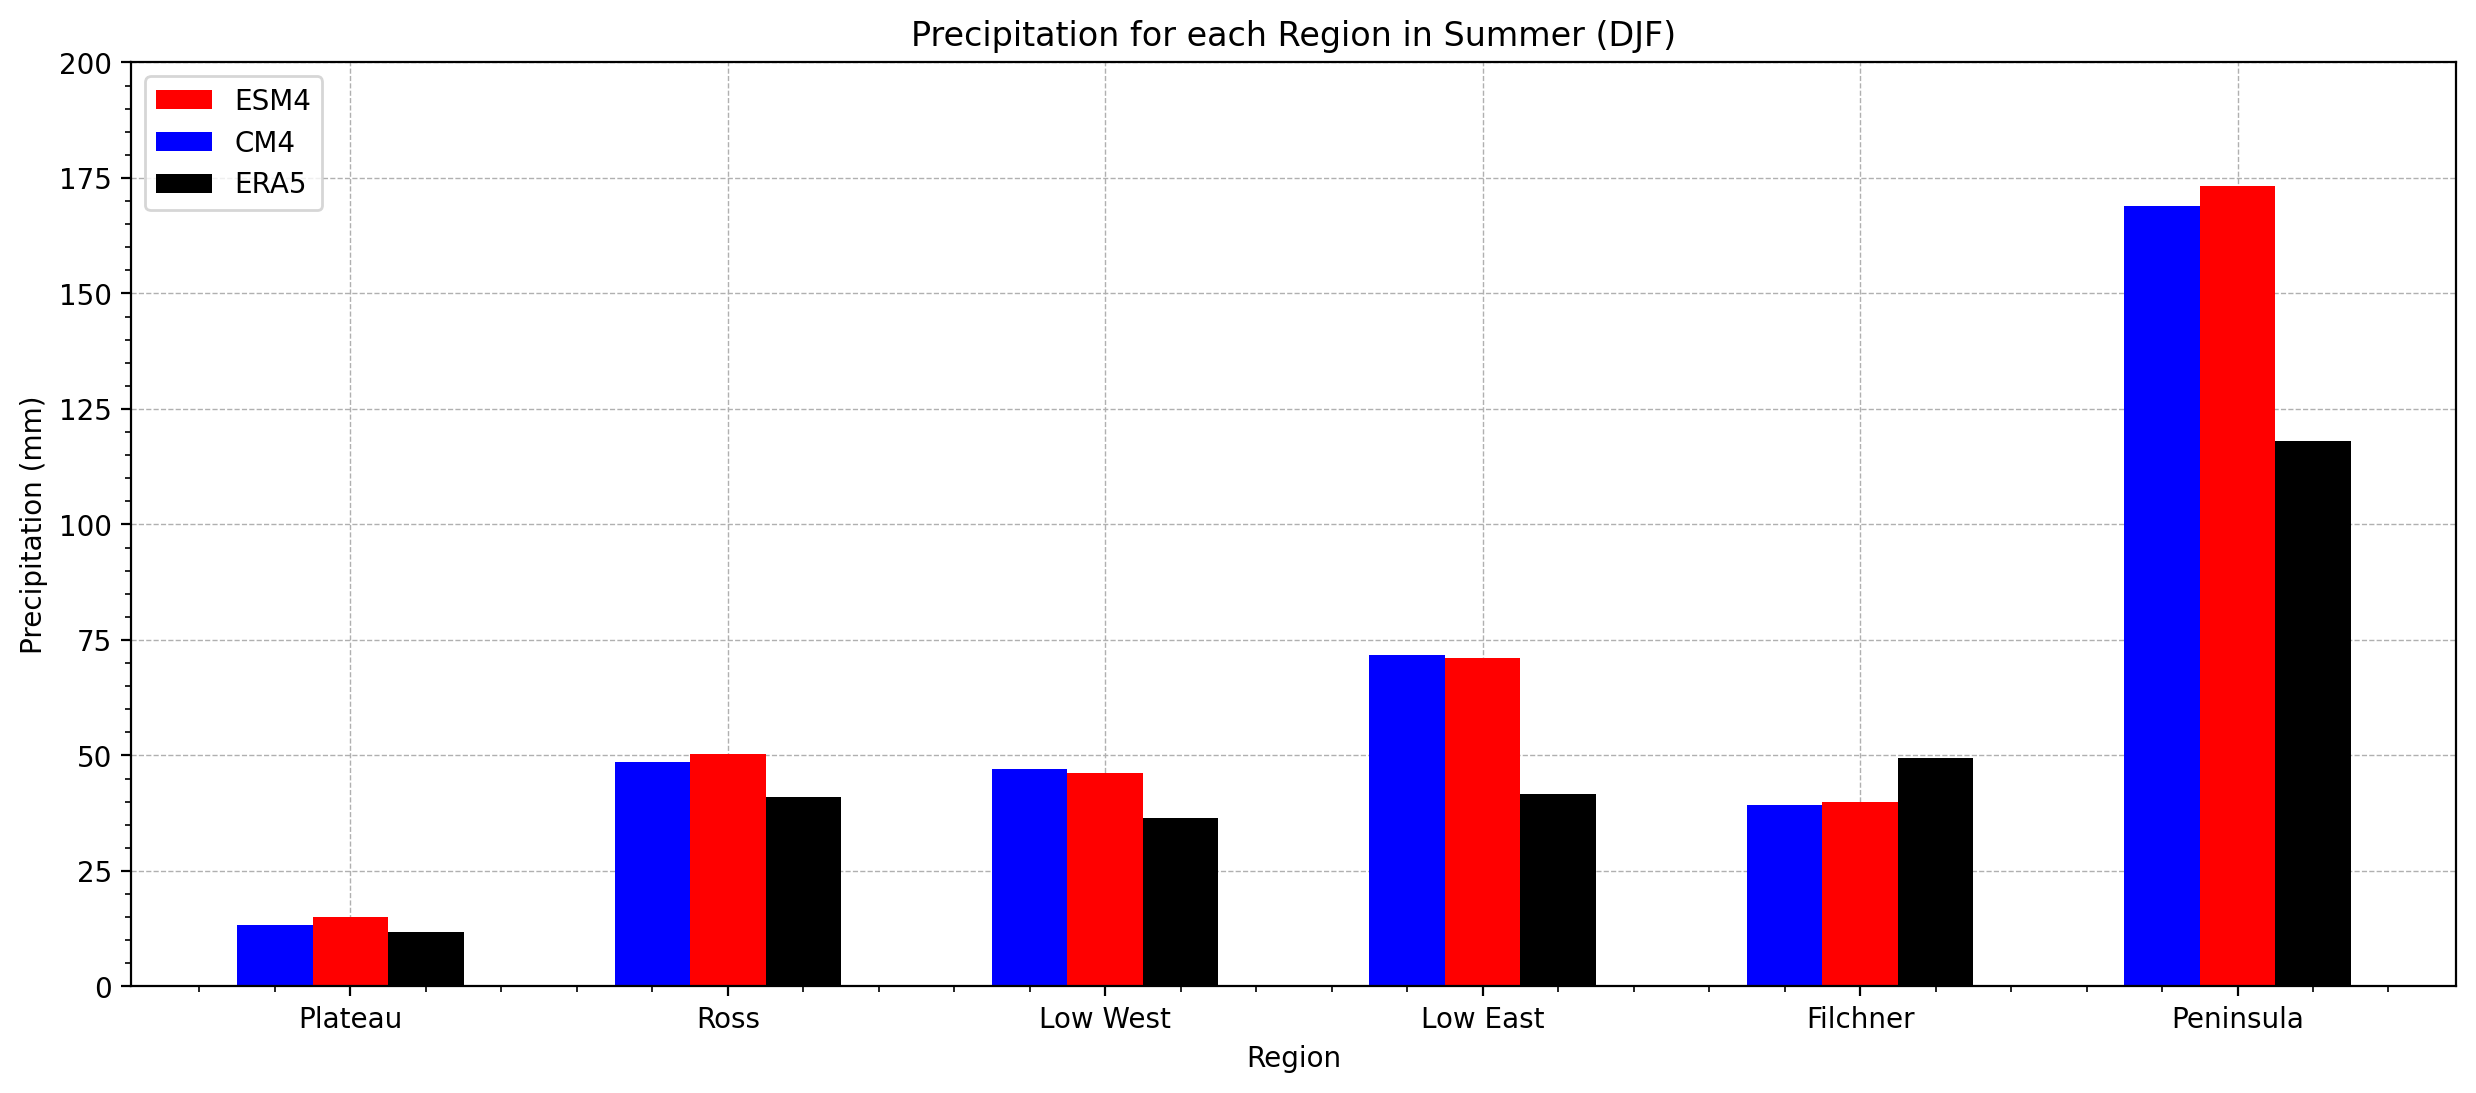

In [65]:

fig, ax= plt.subplots(figsize= (15,6))


X = ['Plateau','Ross','Low West','Low East', 'Filchner', 'Peninsula'] 
CM4_summer = [13.320651913090842,
48.54911407164764,
46.97914955613669,
71.73611936741509,
39.29711919045076,
168.89515455113724

] 
ESM4_summer = [15.110158805327956,
50.37882748001721,
46.11641519295517,
70.99006266798824,
40.02638287784066,
173.32470486871898
] 

ERA5_summer = [11.868570876686135,
40.95920658437535,
36.43750863557216,
41.650032697361894,
49.542500826646574,
118.13077380065806
       ]
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis, ESM4_summer, 0.2, label = 'ESM4', color='r') 
plt.bar(X_axis - 0.2, CM4_summer, 0.2, label = 'CM4', color= 'blue') 
plt.bar(X_axis + 0.2, ERA5_summer, 0.2, label= 'ERA5', color= 'k')
ax.grid(linewidth=0.5, linestyle= '--')
ax.set_axisbelow(True)
plt.xticks(X_axis, X) 
plt.xlabel("Region") 
plt.ylabel("Precipitation (mm)") 
plt.title("Precipitation for each Region in Summer (DJF)") 
plt.legend() 
ax.minorticks_on()
plt.ylim(0,200)
plt.show() 








In [41]:
plat_value_CM4_winter=print(plateau_precip_winter_CM4.values)
ross_value_CM4_winter= print(ross_precip_winter_CM4.values)
west_value_CM4_winter=print(lowwest_precip_winter_CM4.values)
east_value_CM4_winter=print(loweast_precip_winter_CM4.values)
filch_value_CM4_winter=print(filchner_precip_winter_CM4.values)
pen_value_CM4_winter=print(peninsula_precip_winter_CM4.values)

15.474978770362213
50.09975528810173
52.81378813670017
87.7741530071944
65.14294780790806
218.47053347155452


In [42]:
plat_value_ESM4_winter=print(plateau_precip_winter_ESM4.values)
ross_value_ESM4_winter= print(ross_precip_winter_ESM4.values)
west_value_ESM4_winterr=print(lowwest_precip_winter_ESM4.values)
east_value_ESM4_winter=print(loweast_precip_winter_ESM4.values)
filch_value_ESM4_winter=print(filchner_precip_winter_ESM4.values)
pen_value_ESM4_winter=print(peninsula_precip_winter_ESM4.values)

16.547708411235362
48.31797054503113
56.035609828541055
93.2109012035653
67.51170130446553
222.61251211166382


In [43]:
plat_value_ERA5_winter=print(plateau_precip_winter_ERA5.values)
ross_value_ERA5_winter= print(ross_precip_winter_ERA5.values)
west_value_ERA5_winterr=print(lowwest_precip_winter_ERA5.values)
east_value_ERA5_winter=print(loweast_precip_winter_ERA5.values)
filch_value_ERA5_winter=print(filchner_precip_winter_ERA5.values)
pen_value_ERA5_winter=print(peninsula_precip_winter_ERA5.values)

17.905802014865912
74.2102385731414
65.51074309973046
72.47586417943239
41.88856183318421
187.6762608764693


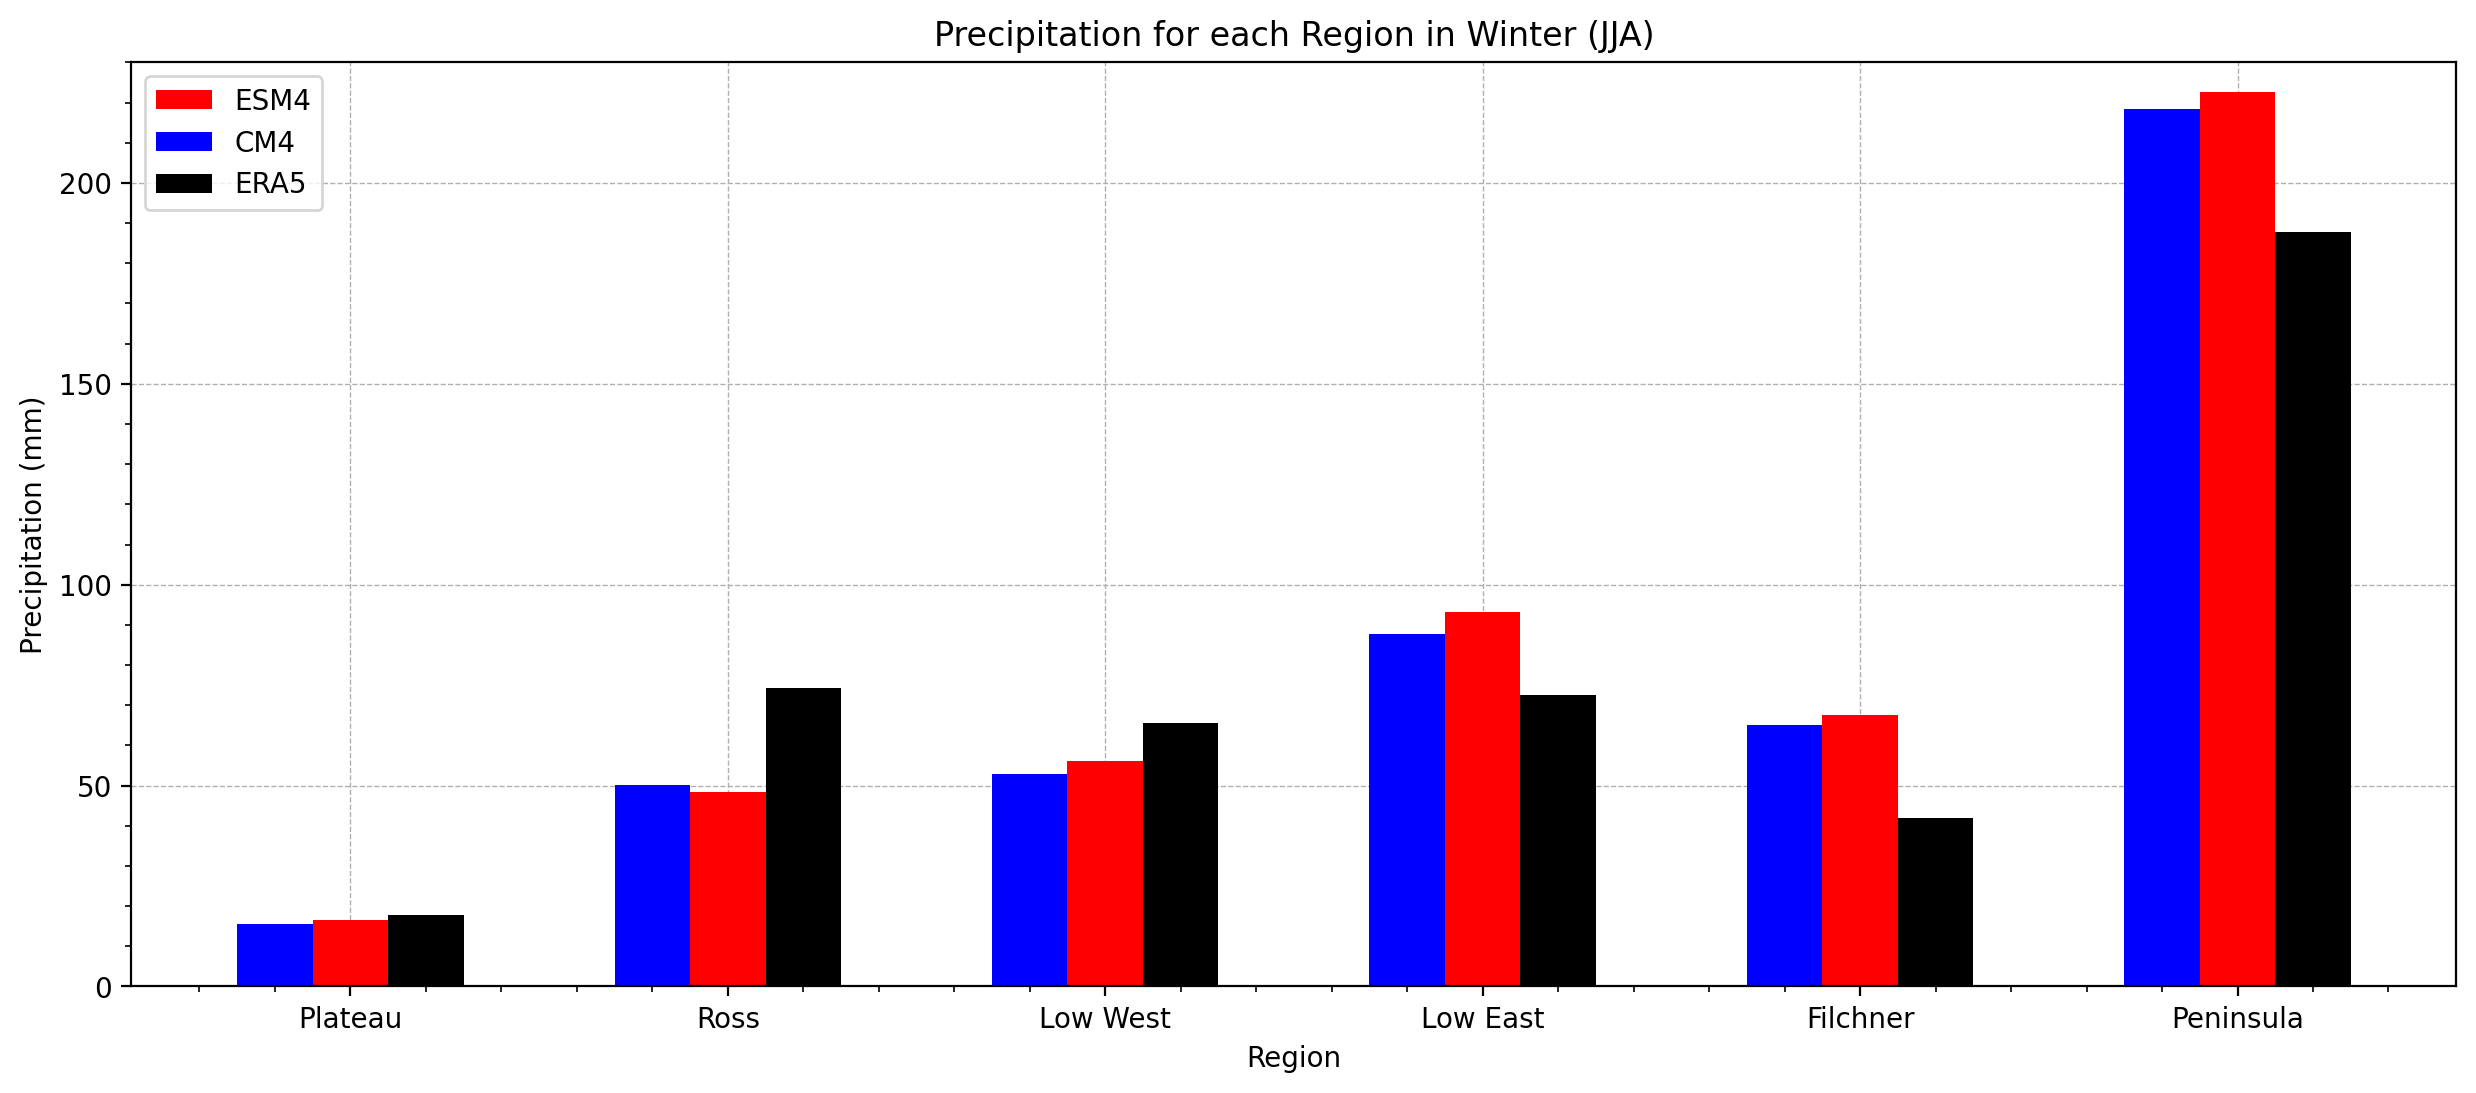

In [66]:

fig, ax= plt.subplots(figsize= (15,6))


X = ['Plateau','Ross','Low West','Low East', 'Filchner', 'Peninsula'] 
CM4_winter = [15.474978770362213,
50.09975528810173,
52.81378813670017,
87.7741530071944,
65.14294780790806,
218.47053347155452
] 
ESM4_winter = [16.547708411235362,
48.31797054503113,
56.035609828541055,
93.2109012035653,
67.51170130446553,
222.61251211166382
] 

ERA5_winter = [17.905802014865912,
74.2102385731414,
65.51074309973046,
72.47586417943239,
41.88856183318421,
187.6762608764693]
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis, ESM4_winter, 0.2, label = 'ESM4', color='r') 
plt.bar(X_axis - 0.2, CM4_winter, 0.2, label = 'CM4', color= 'blue') 
plt.bar(X_axis + 0.2, ERA5_winter, 0.2, label= 'ERA5', color= 'k')
ax.grid(linewidth=0.5, linestyle= '--')
ax.set_axisbelow(True)
plt.xticks(X_axis, X) 
plt.xlabel("Region") 
plt.ylabel("Precipitation (mm)") 
plt.title("Precipitation for each Region in Winter (JJA)") 
plt.legend() 
ax.minorticks_on()
plt.ylim(0,230)
plt.show() 





In [48]:
plat_value_CM4_spring=print(plateau_precip_spring_CM4.values)
ross_value_CM4_spring= print(ross_precip_spring_CM4.values)
west_value_CM4_spring=print(lowwest_precip_spring_CM4.values)
east_value_CM4_spring=print(loweast_precip_spring_CM4.values)
filch_value_CM4_spring=print(filchner_precip_spring_CM4.values)
pen_value_CM4_spring=print(peninsula_precip_spring_CM4.values)

13.784113614747184
44.52837629505666
47.94503028388135
67.68894901033491
55.89232380007161
211.5782001055777


In [49]:
plat_value_ESM4_spring=print(plateau_precip_spring_ESM4.values)
ross_value_ESM4_spring= print(ross_precip_spring_ESM4.values)
west_value_ESM4_springr=print(lowwest_precip_spring_ESM4.values)
east_value_ESM4_spring=print(loweast_precip_spring_ESM4.values)
filch_value_ESM4_spring=print(filchner_precip_spring_ESM4.values)
pen_value_ESM4_spring=print(peninsula_precip_spring_ESM4.values)

15.193076369905612
41.991676097677555
50.50185643922305
74.75588828965556
64.45638192817569
216.40391070395708


In [50]:
plat_value_ERA5_spring=print(plateau_precip_spring_ERA5.values)
ross_value_ERA5_spring= print(ross_precip_spring_ERA5.values)
west_value_ERA5_springr=print(lowwest_precip_spring_ERA5.values)
east_value_ERA5_spring=print(loweast_precip_spring_ERA5.values)
filch_value_ERA5_spring=print(filchner_precip_spring_ERA5.values)
pen_value_ERA5_spring=print(peninsula_precip_spring_ERA5.values)

16.108793155581225
38.79301458655391
51.31581897003343
49.07131521758856
54.11345226602862
217.83158445032313


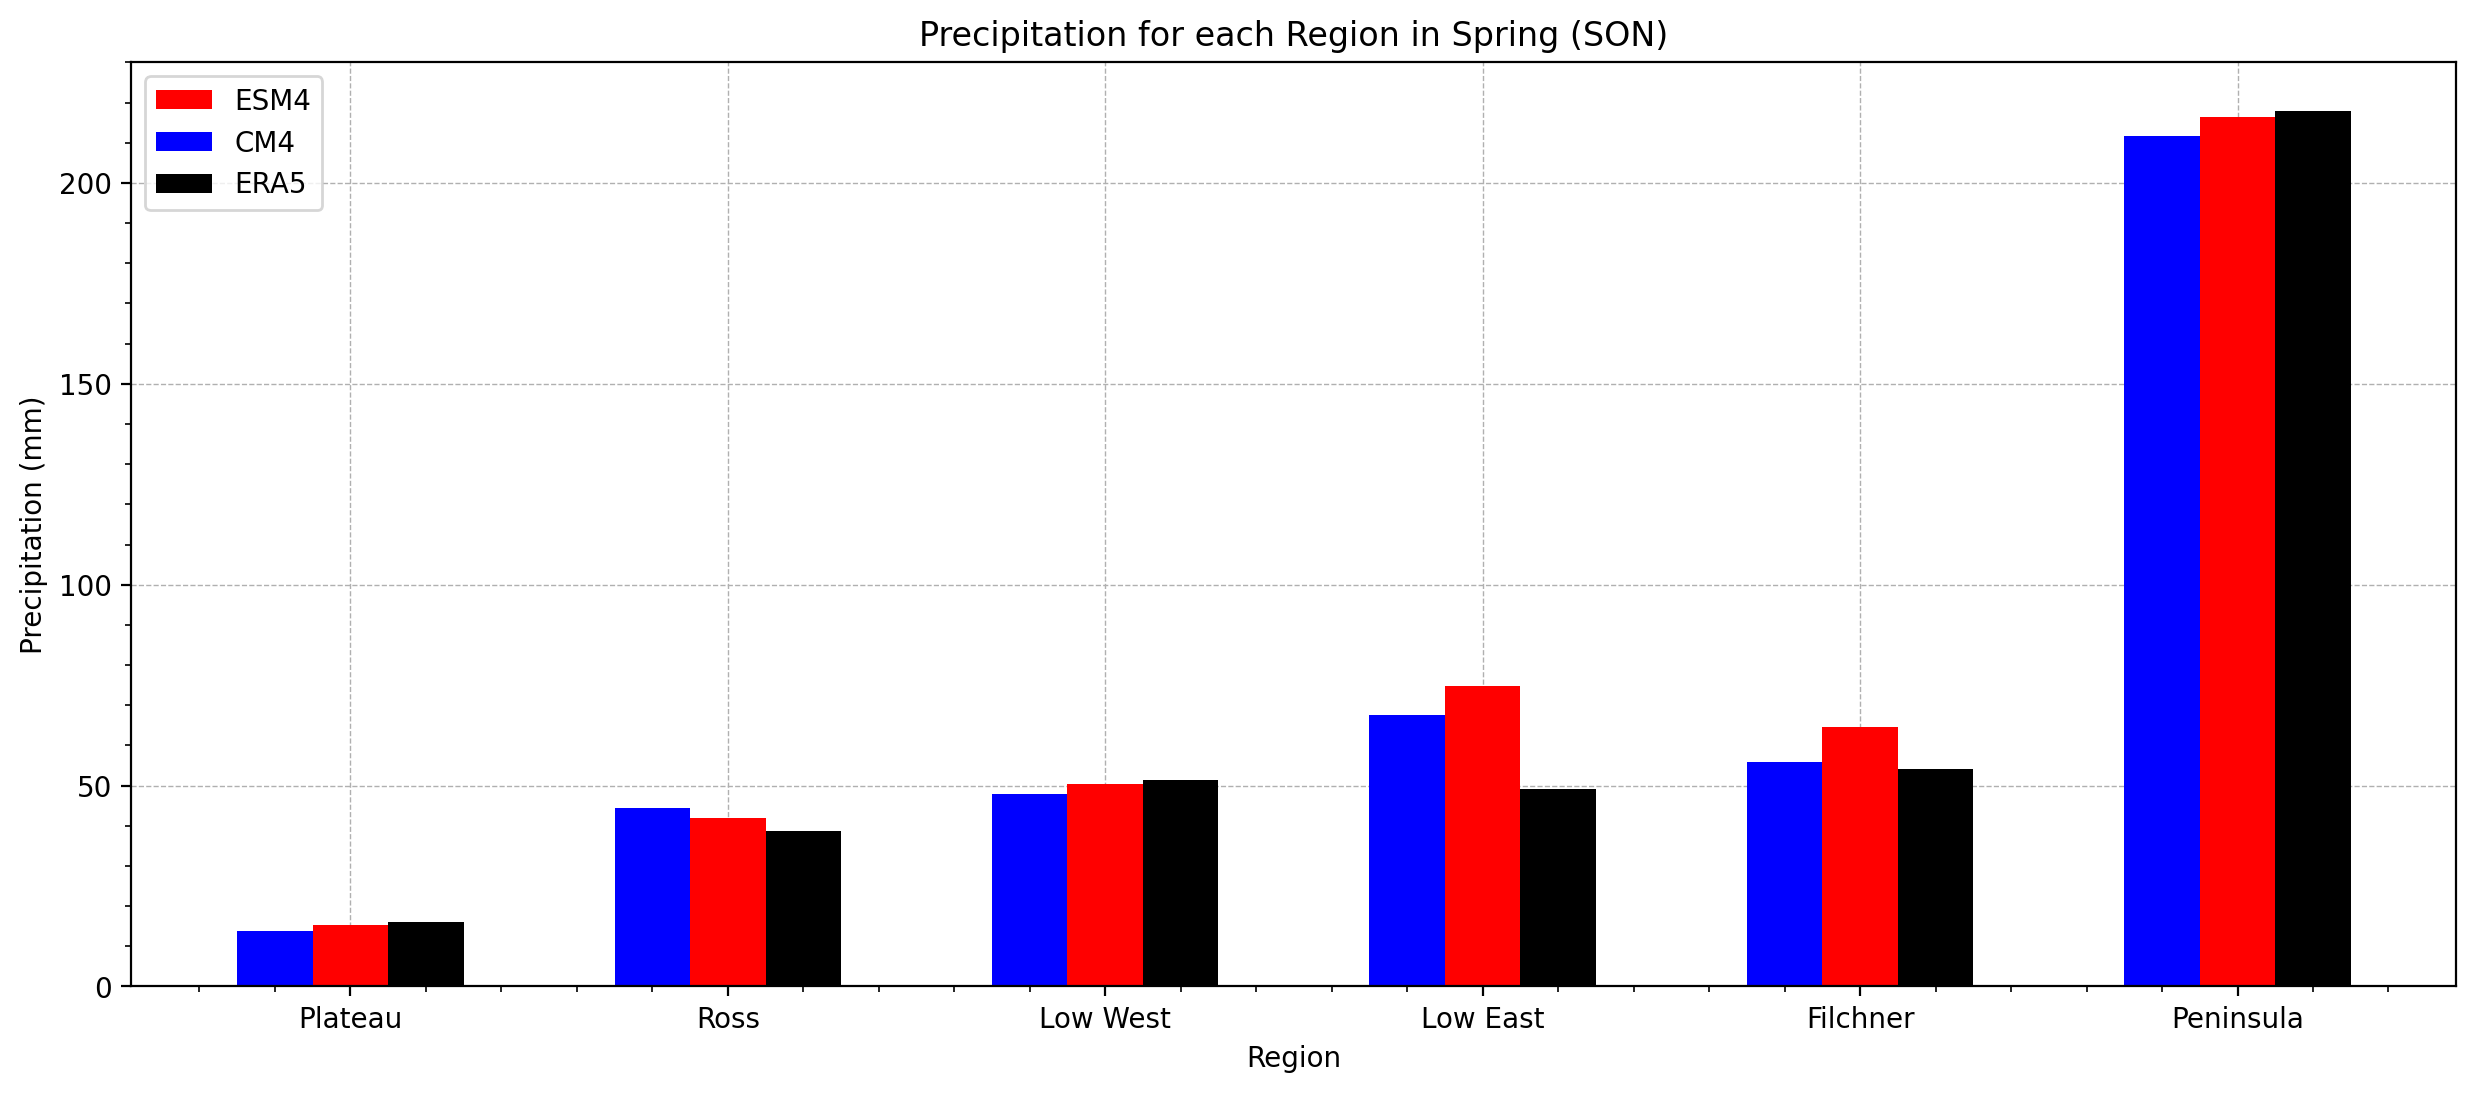

In [67]:

fig, ax= plt.subplots(figsize= (15,6))


X = ['Plateau','Ross','Low West','Low East', 'Filchner', 'Peninsula'] 
CM4_spring = [13.784113614747184,
44.52837629505666,
47.94503028388135,
67.68894901033491,
55.89232380007161,
211.5782001055777
] 
ESM4_spring = [15.193076369905612,
41.991676097677555,
50.50185643922305,
74.75588828965556,
64.45638192817569,
216.40391070395708
] 

ERA5_spring = [16.108793155581225,
38.79301458655391,
51.31581897003343,
49.07131521758856,
54.11345226602862,
217.83158445032313
]
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis, ESM4_spring, 0.2, label = 'ESM4', color='r') 
plt.bar(X_axis - 0.2, CM4_spring, 0.2, label = 'CM4', color= 'blue') 
plt.bar(X_axis + 0.2, ERA5_spring, 0.2, label= 'ERA5', color= 'k')
ax.grid(linewidth=0.5, linestyle= '--')
ax.set_axisbelow(True)
plt.xticks(X_axis, X) 
plt.xlabel("Region") 
plt.ylabel("Precipitation (mm)") 
plt.title("Precipitation for each Region in Spring (SON)") 
plt.legend() 
ax.minorticks_on()
plt.ylim(0,230)
plt.show() 





In [53]:
plat_value_CM4_fall=print(plateau_precip_fall_CM4.values)
ross_value_CM4_fall= print(ross_precip_fall_CM4.values)
west_value_CM4_fall=print(lowwest_precip_fall_CM4.values)
east_value_CM4_fall=print(loweast_precip_fall_CM4.values)
filch_value_CM4_fall=print(filchner_precip_fall_CM4.values)
pen_value_CM4_fall=print(peninsula_precip_fall_CM4.values)

19.168451384757645
67.19399123685434
62.530187889933586
93.58170392224565
64.36506528407335
244.72990999929607


In [54]:
plat_value_ESM4_fall=print(plateau_precip_fall_ESM4.values)
ross_value_ESM4_fall= print(ross_precip_fall_ESM4.values)
west_value_ESM4_fallr=print(lowwest_precip_fall_ESM4.values)
east_value_ESM4_fall=print(loweast_precip_fall_ESM4.values)
filch_value_ESM4_fall=print(filchner_precip_fall_ESM4.values)
pen_value_ESM4_fall=print(peninsula_precip_fall_ESM4.values)

22.292047334485687
68.62203462515026
69.5442158030346
96.15538897924125
75.11478003580123
267.3864180687815


In [55]:
plat_value_ERA5_fall=print(plateau_precip_fall_ERA5.values)
ross_value_ERA5_fall= print(ross_precip_fall_ERA5.values)
west_value_ERA5_fallr=print(lowwest_precip_fall_ERA5.values)
east_value_ERA5_fall=print(loweast_precip_fall_ERA5.values)
filch_value_ERA5_fall=print(filchner_precip_fall_ERA5.values)
pen_value_ERA5_fall=print(peninsula_precip_fall_ERA5.values)

20.761341165052727
77.70937972236425
58.94020943669602
81.80972429690883
56.29697040421888
176.52788856066763


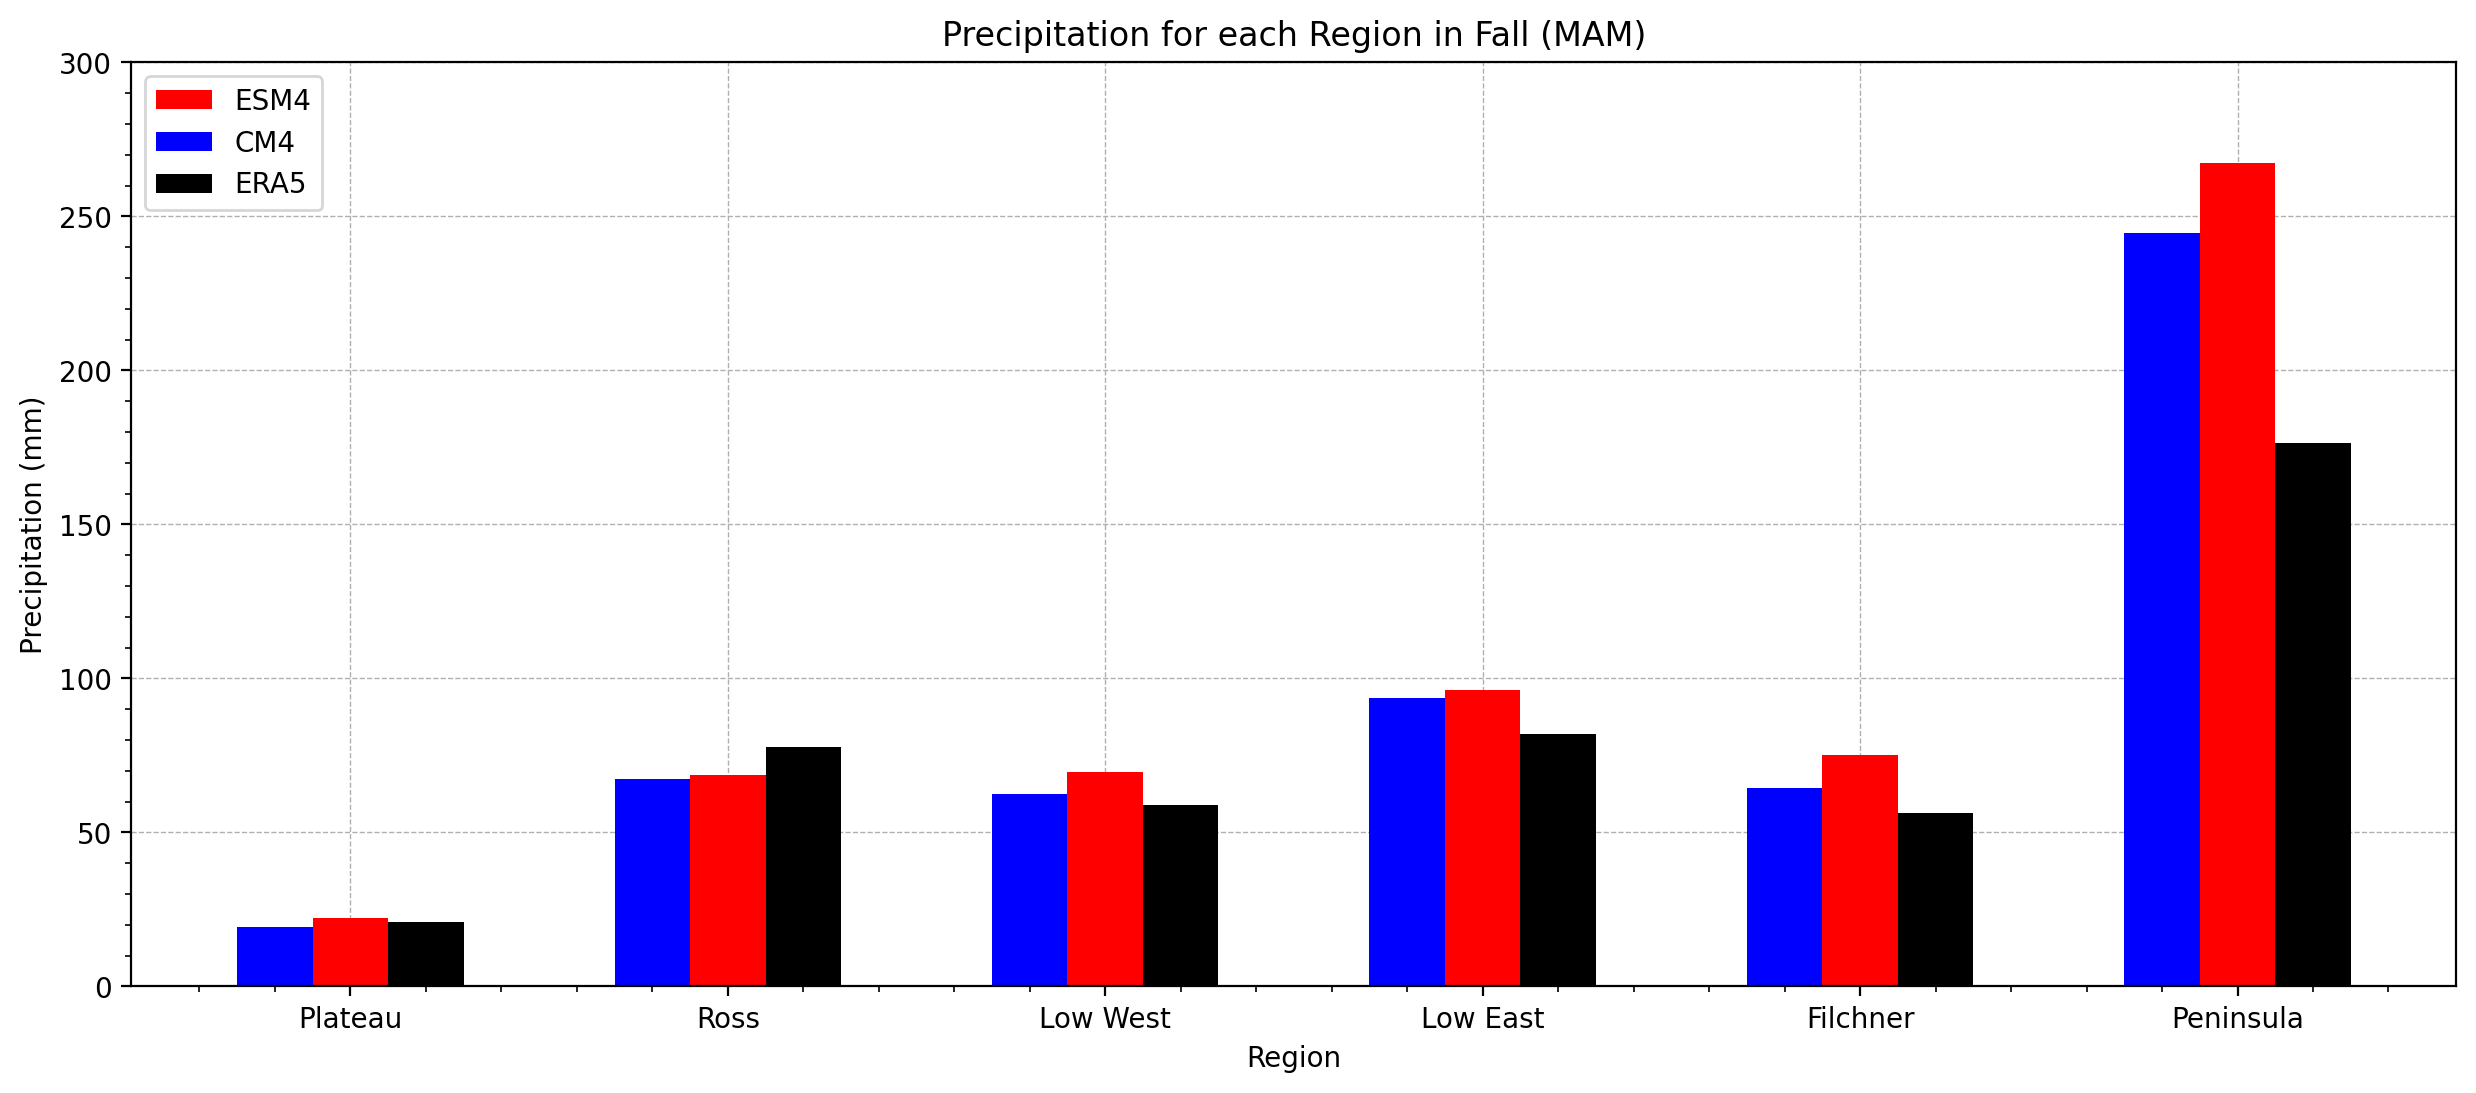

In [69]:

fig, ax= plt.subplots(figsize= (15,6))


X = ['Plateau','Ross','Low West','Low East', 'Filchner', 'Peninsula'] 
CM4_fall = [19.168451384757645,
67.19399123685434,
62.530187889933586,
93.58170392224565,
64.36506528407335,
244.72990999929607
] 
ESM4_fall = [22.292047334485687,
68.62203462515026,
69.5442158030346,
96.15538897924125,
75.11478003580123,
267.3864180687815
] 

ERA5_fall = [20.761341165052727,
77.70937972236425,
58.94020943669602,
81.80972429690883,
56.29697040421888,
176.52788856066763
]
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis, ESM4_fall, 0.2, label = 'ESM4', color='r') 
plt.bar(X_axis - 0.2, CM4_fall, 0.2, label = 'CM4', color= 'blue') 
plt.bar(X_axis + 0.2, ERA5_fall, 0.2, label= 'ERA5', color= 'k')
ax.grid(linewidth=0.5, linestyle= '--')
ax.set_axisbelow(True)
plt.xticks(X_axis, X) 
plt.xlabel("Region") 
plt.ylabel("Precipitation (mm)") 
plt.title("Precipitation for each Region in Fall (MAM)") 
plt.legend() 
ax.minorticks_on()
plt.ylim(0,300)
plt.show() 



